In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter


In [ ]:
igk = pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/summarize_stat_n6.csv",header=None,sep='\t')

NameError: name 'pd' is not defined

In [21]:
new_headers = ['sequence_type','method', 'precision', 'recall', 'continuity']
igk = igk.iloc[:,[0,2,4,6,12]]
igk.columns=new_headers

In [22]:
igk[['method', 'preprocess']] = igk['method'].str.rsplit('_', n=1, expand=True)
igk[['de_method', 'distance','dimension_reduction']] = igk['method'].str.split('_', n=2, expand=True)
igk[['error_rate','length']] = igk['sequence_type'].str.rsplit('_', n=1, expand=True)

In [23]:
Counter(igk.dimension_reduction.tolist())

Counter({'GaussianRP_500d': 288,
         'PCA_500d': 288,
         'Spectural_500d': 288,
         'umap_500d': 288,
         'SparseRP_500d': 288,
         'scBiMap_500d': 288,
         'None': 28,
         'GaussianRP_3200d': 8,
         'SparseRP_3200d': 8,
         None: 2,
         'isomap_500d': 1})

In [24]:
#igk_idf = igk[igk.loc[:,'preprocess'] == 'IDF']
igk = igk[igk['dimension_reduction'].isin(['GaussianRP_500d','PCA_500d','Spectural_500d','SparseRP_500d','scBiMap_500d','umap_500d'])]

In [27]:
Counter(igk.de_method.tolist())

Counter({'HNSW': 432, 'Exact': 432, 'NNDescent': 432, 'PQ': 432})

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

model = ols('precision ~  C(preprocess) + C(de_method) + C(distance) + C(dimension_reduction) + C(length) + C(error_rate)', data=igk).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)
anova_table.to_csv('/home/miaocj/docker_dir/kNN-overlap-finder/data/final_analysis/all_igk_precision.csv')

                           sum_sq      df            F         PR(>F)
Intercept               55.065736     1.0  8701.617853   0.000000e+00
C(preprocess)            2.146830     3.0   113.082410   8.404923e-67
C(de_method)             2.593333     3.0   136.601521   2.437395e-79
C(distance)              0.456511     1.0    72.138956   4.289393e-17
C(dimension_reduction)   3.830128     5.0   121.049177  7.509660e-110
C(length)                2.099110     2.0   165.853190   1.459476e-66
C(error_rate)            0.117946     2.0     9.319089   9.433128e-05
Residual                10.827581  1711.0          NaN            NaN


In [48]:
igk

,sequence_type,method,precision,recall,continuity,preprocess,de_method,distance,dimension_reduction,error_rate,length
0,pbsim_ONT_93_20k,HNSW_Cosine_GaussianRP_500d,0.750917,0.171949,0.971508,IDF,HNSW,Cosine,GaussianRP_500d,pbsim_ONT_93,20k
1,pbsim_ONT_93_20k,HNSW_Euclidean_PCA_500d,0.651341,0.138893,0.882263,IDF,HNSW,Euclidean,PCA_500d,pbsim_ONT_93,20k
2,pbsim_ONT_93_20k,Exact_Euclidean_Spectural_500d,0.694822,0.127743,0.934358,IDF,Exact,Euclidean,Spectural_500d,pbsim_ONT_93,20k
3,pbsim_ONT_93_20k,HNSW_Euclidean_Spectural_500d,0.454406,0.102902,0.744693,IDF,HNSW,Euclidean,Spectural_500d,pbsim_ONT_93,20k
4,pbsim_ONT_93_20k,Exact_Cosine_Spectural_500d,0.708139,0.130407,0.943017,IDF,Exact,Cosine,Spectural_500d,pbsim_ONT_93,20k
...,...,...,...,...,...,...,...,...,...,...,...
1768,pbsim_ONT_93_30k,PQ_Cosine_SparseRP_500d,0.571086,0.143184,0.821582,None,PQ,Cosine,SparseRP_500d,pbsim_ONT_93,30k
1769,pbsim_ONT_93_30k,HNSW_Cosine_umap_500d,0.747165,0.147377,0.959264,IDF,HNSW,Cosine,umap_500d,pbsim_ONT_93,30k
1771,pbsim_ONT_93_30k,NNDescent_Cosine_umap_500d,0.593384,0.112205,0.844497,TF,NNDescent,Cosine,umap_500d,pbsim_ONT_93,30k
1773,pbsim_ONT_93_30k,Exact_Euclidean_SparseRP_500d,0.549948,0.133916,0.920094,None,Exact,Euclidean,SparseRP_500d,pbsim_ONT_93,30k


In [ ]:
from sklearn.tree import DecisionTreeRegressor
igk_c = igk.copy()
igk_c['preprocess_c'] = pd.factorize(igk_c['preprocess'])[0]
igk_c['de_method_c'] = pd.factorize(igk_c['de_method'])[0]
igk_c['distance_c'] = pd.factorize(igk_c['distance'])[0]
igk_c['dimension_reduction_c'] = pd.factorize(igk_c['dimension_reduction'])[0]
igk_c['error_rate_c'] = pd.factorize(igk_c['error_rate'])[0]
igk_c['length_c'] = pd.factorize(igk_c['length'])[0]

X=igk_c.loc[:,['preprocess_c','de_method_c','distance_c','dimension_reduction_c','error_rate_c','length_c']]
y=igk.loc[:,'precision']
# 训练决策树模型
model = DecisionTreeRegressor()
model.fit(X,y)

# 查看特征重要性
feature_importances = model.feature_importances_
#print(model.feature_importances_)



[0.13975538 0.14074244 0.11862264 0.43247558 0.04099512 0.12740885]


In [62]:
from sklearn.ensemble import RandomForestRegressor

# 训练随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X,y)

# 查看特征重要性
feature_importances = model.feature_importances_

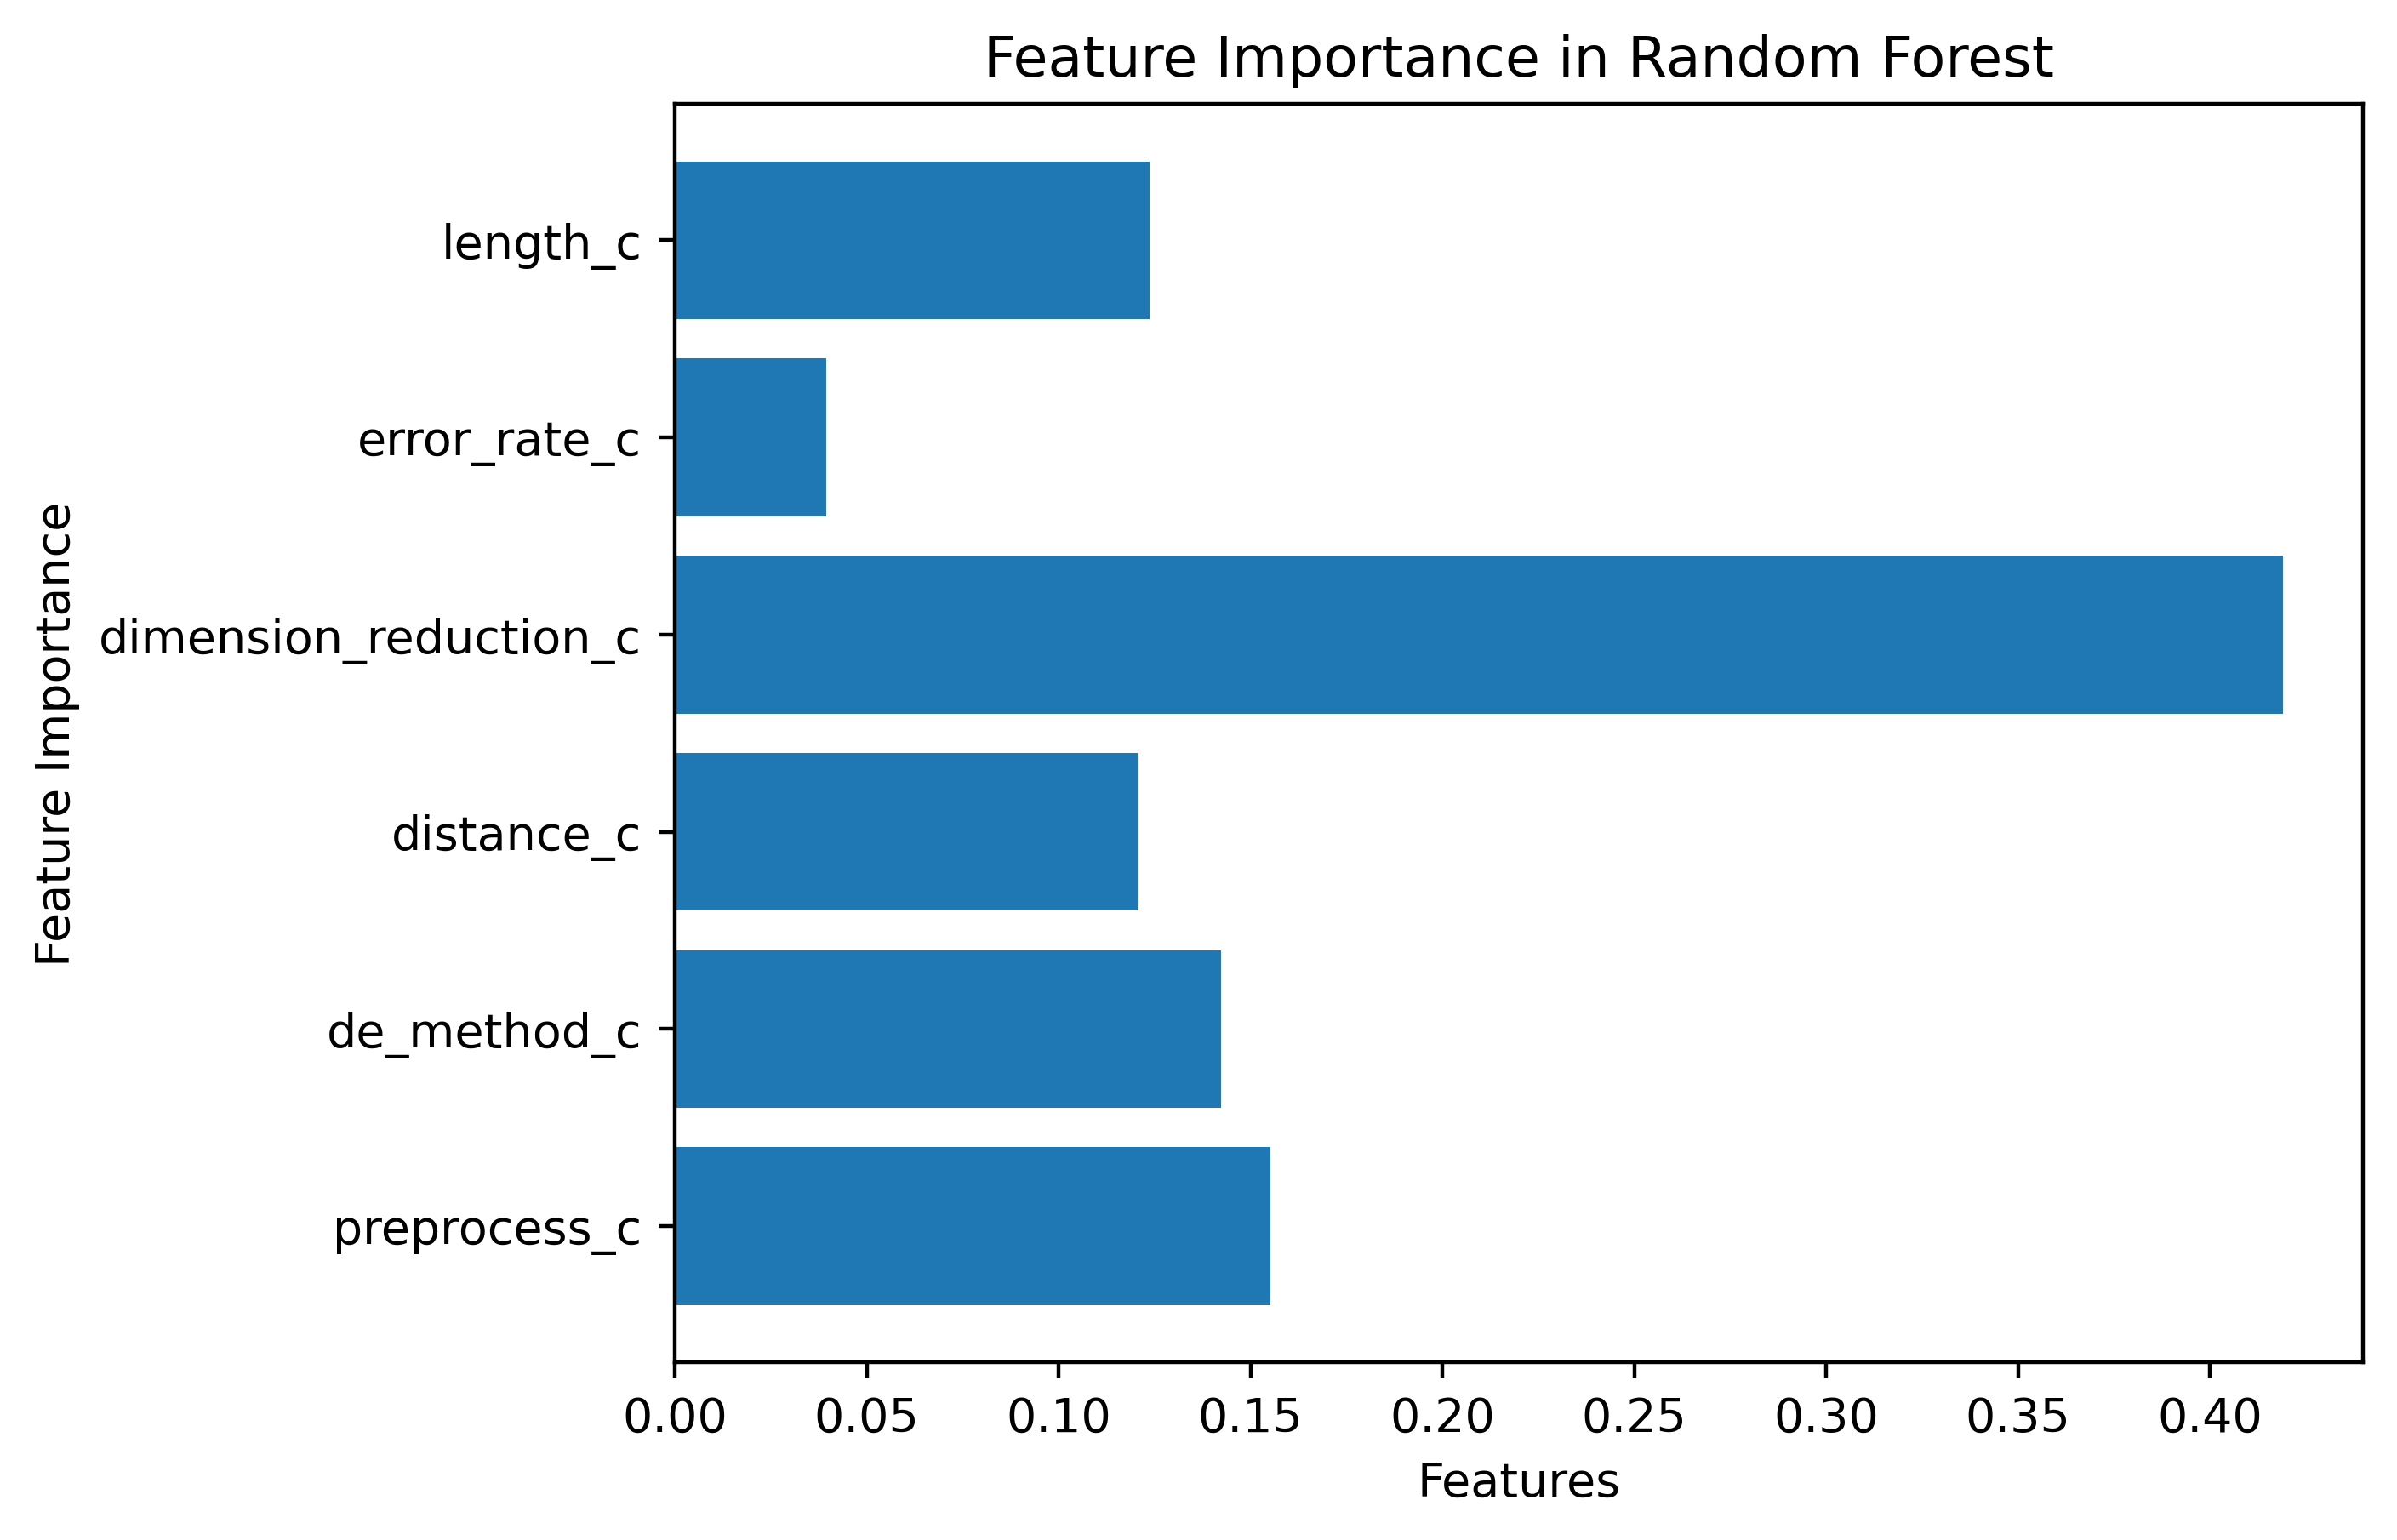

In [63]:
import matplotlib.pyplot as plt

# 绘制特征重要性条形图
plt.barh(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

In [52]:
X_encoded

,preprocess_IDF,preprocess_None,preprocess_TF,preprocess_TF-IDF,de_method_Exact,de_method_HNSW,de_method_NNDescent,de_method_PQ,distance_Cosine,distance_Euclidean,...,dimension_reduction_SparseRP_500d,dimension_reduction_Spectural_500d,dimension_reduction_scBiMap_500d,dimension_reduction_umap_500d,error_rate_pbsim_ONT_93,error_rate_pbsim_ONT_95,error_rate_pbsim_ONT_98,length_10k,length_20k,length_30k
0,True,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3,True,False,False,False,False,True,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
4,True,False,False,False,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,False,True,False,False,False,False,False,True,True,False,...,True,False,False,False,True,False,False,False,False,True
1769,True,False,False,False,False,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,True
1771,False,False,True,False,False,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,True
1773,False,True,False,False,True,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True


In [31]:
one_line = pd.melt(igk, id_vars=['error_rate','length','preprocess','de_method','distance','dimension_reduction'], value_vars=['precision', 'recall','continuity'])

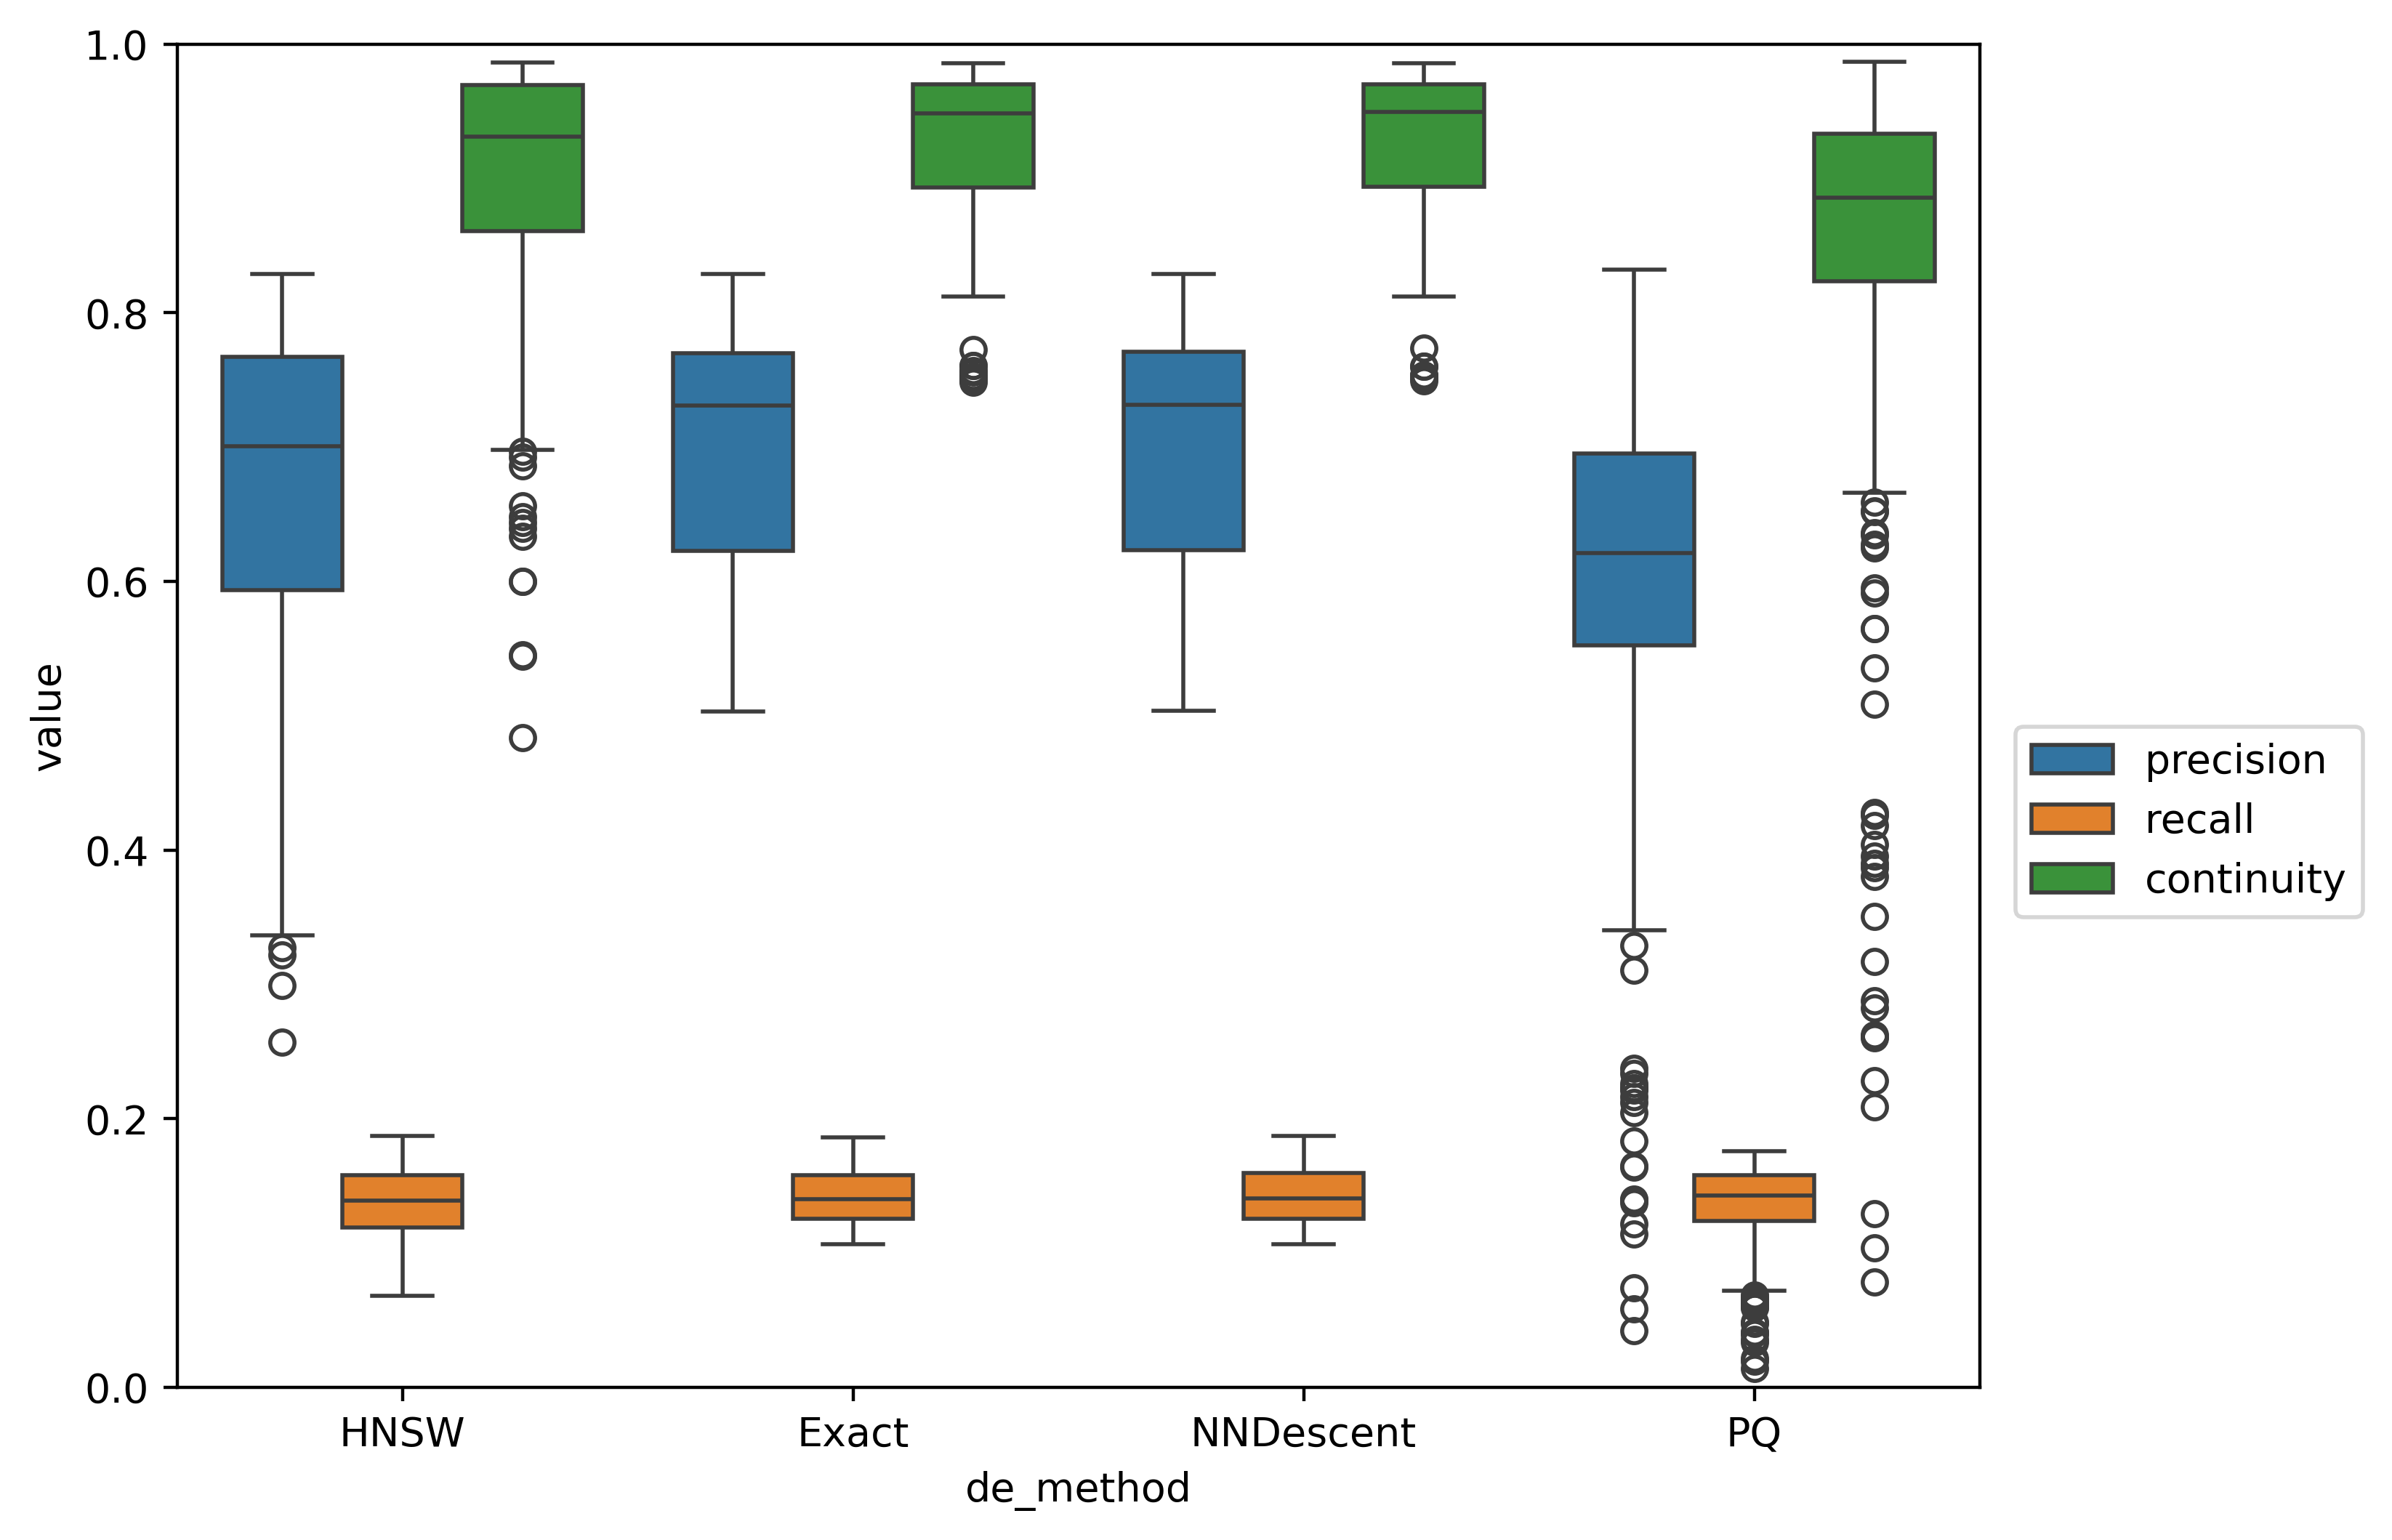

In [32]:
#one_line = one_line.replace({'PQ':'ProductQuantization','Exact':'ExactNearestNeighbors'})  

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 400
plt.figure(figsize=(8, 6))

sns.boxplot(x = 'de_method', y = 'value', data = one_line,hue='variable')  #绘制箱线图
plt.legend(loc = (1.02,0.35))
plt.ylim(0,1)
#plt.xticks(rotation=25)

plt.show()

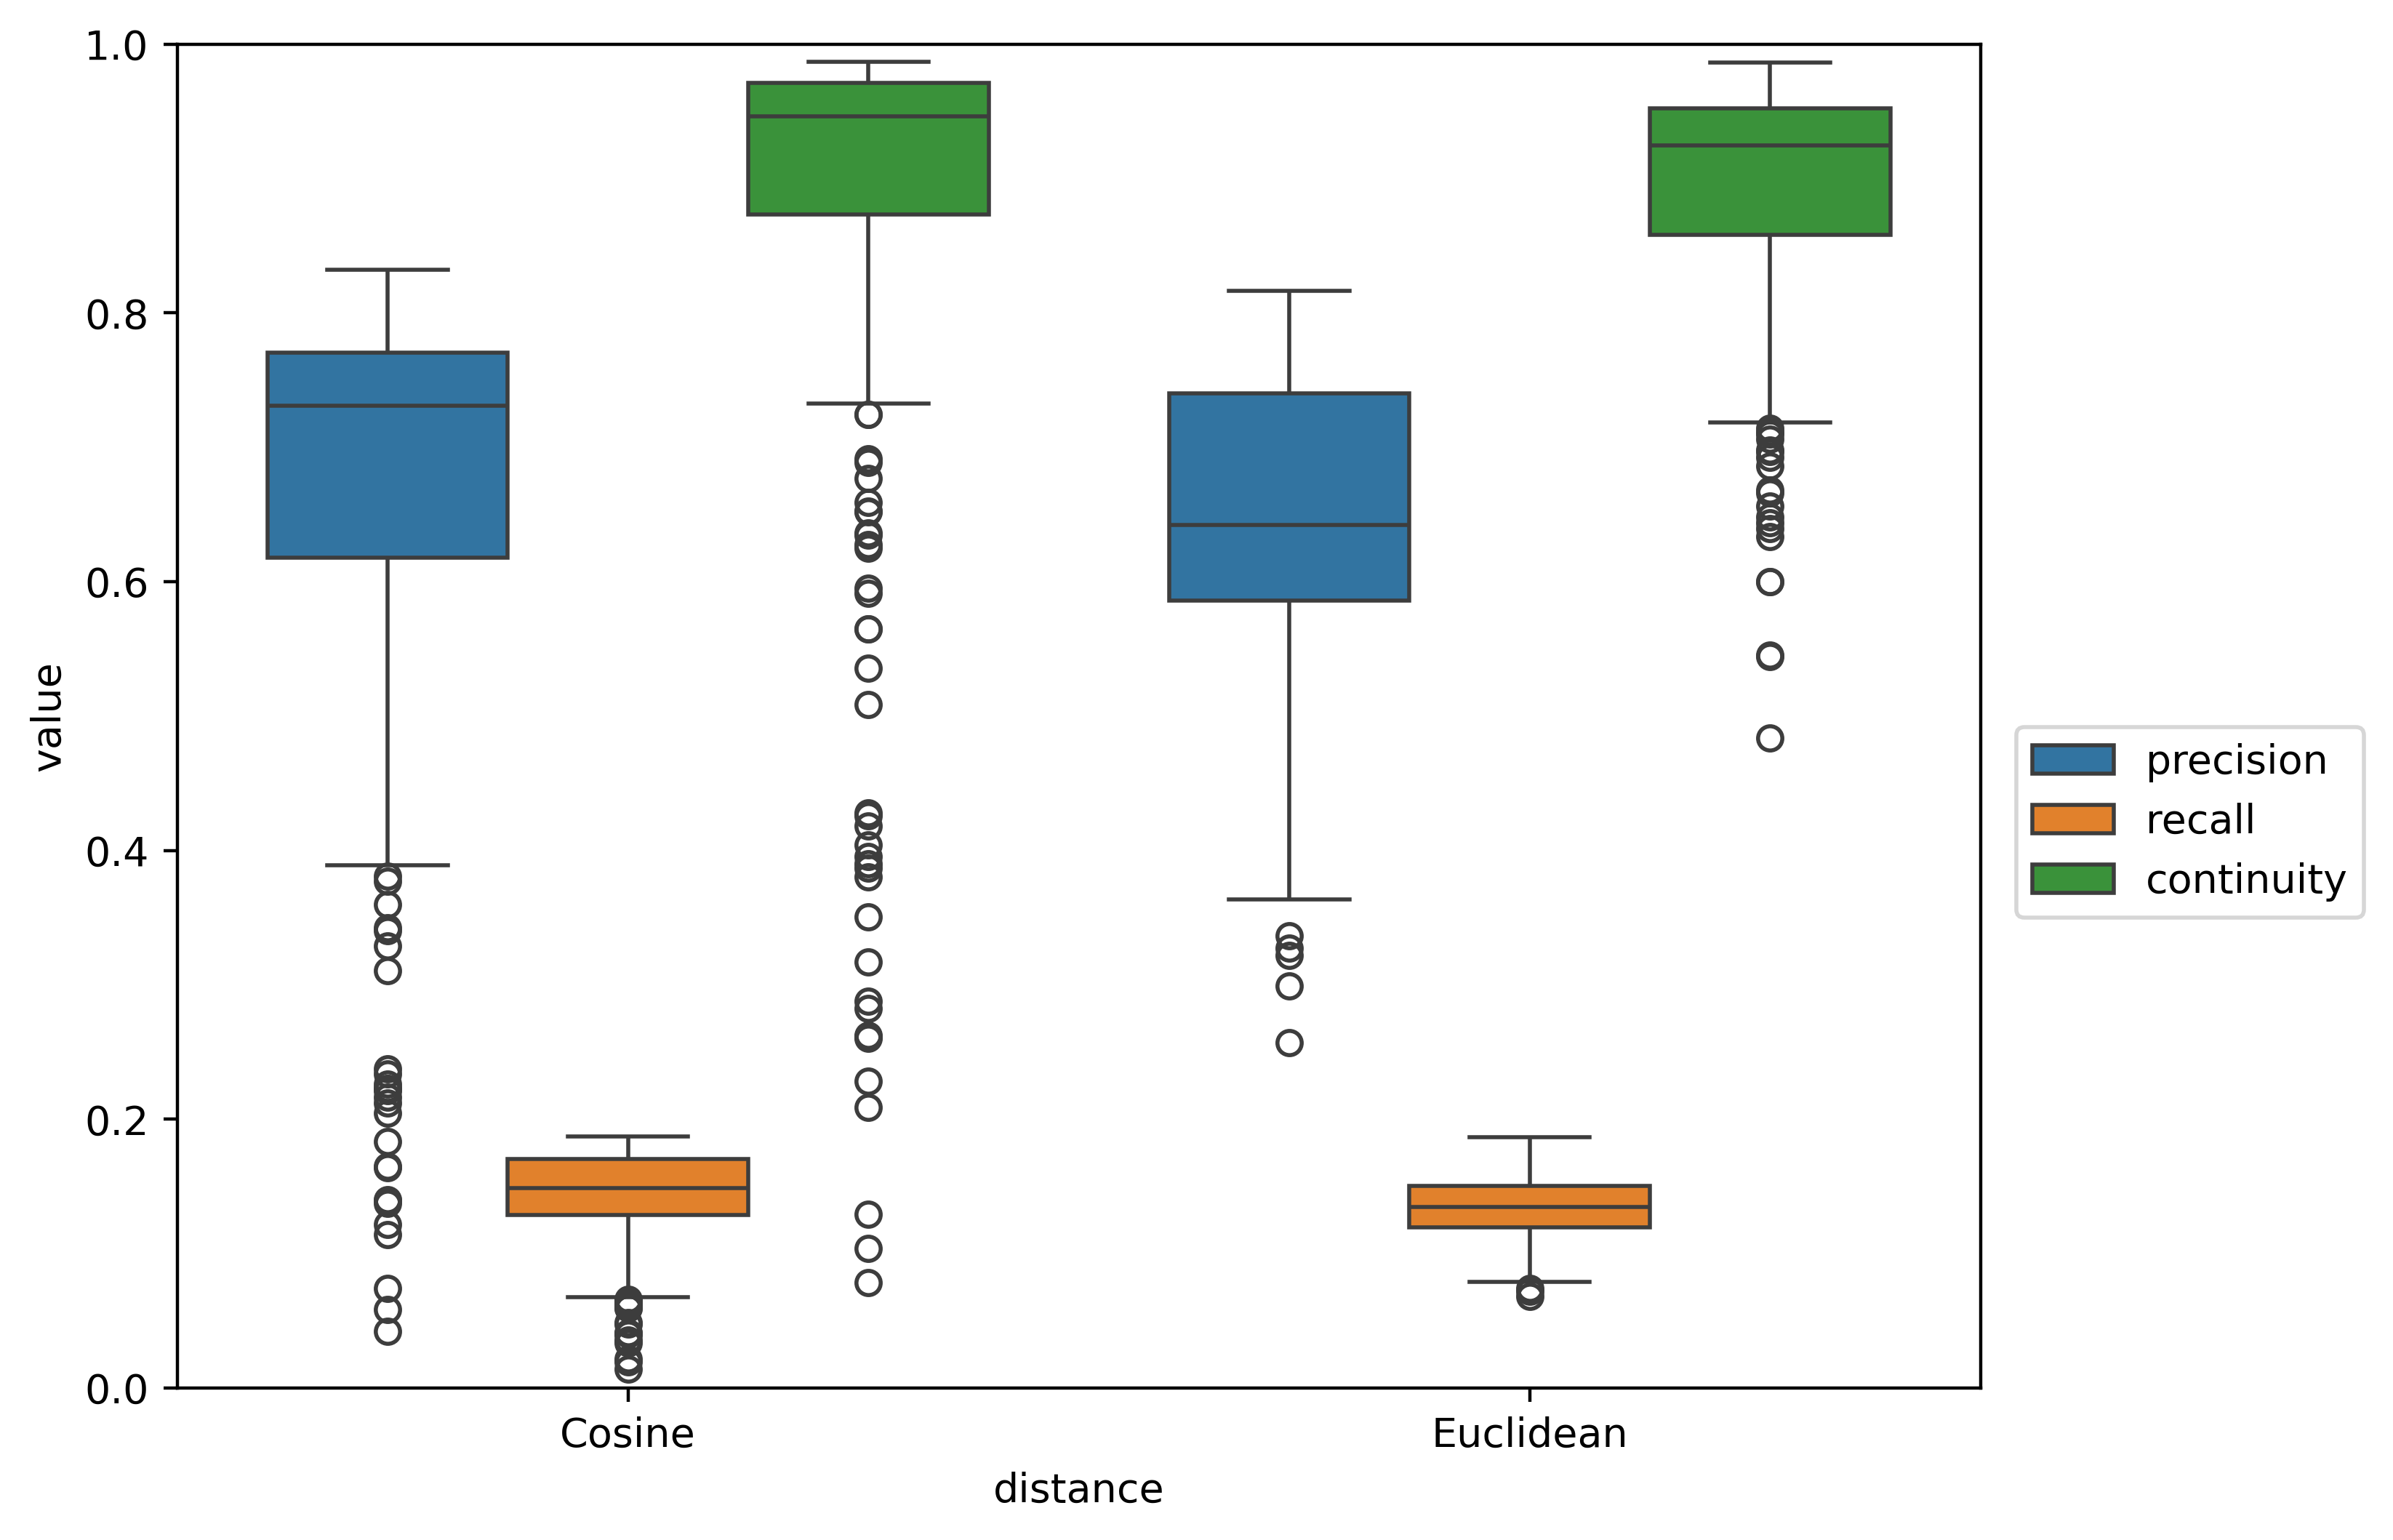

In [47]:
one_line = one_line.replace({'GaussianRP_500d':'GaussianRP','PCA_500d':'PCA','Spectural_500d':'Spectral','SparseRP_500d':'SparseRP','scBiMap_500d':'scBiMapping','umap_500d':'UMAP'})  

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 400
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'distance', y = 'value', data = one_line,hue='variable')  #绘制箱线图
plt.legend(loc = (1.02,0.35))
plt.ylim(0,1)
#plt.xticks(rotation=45)

plt.show()

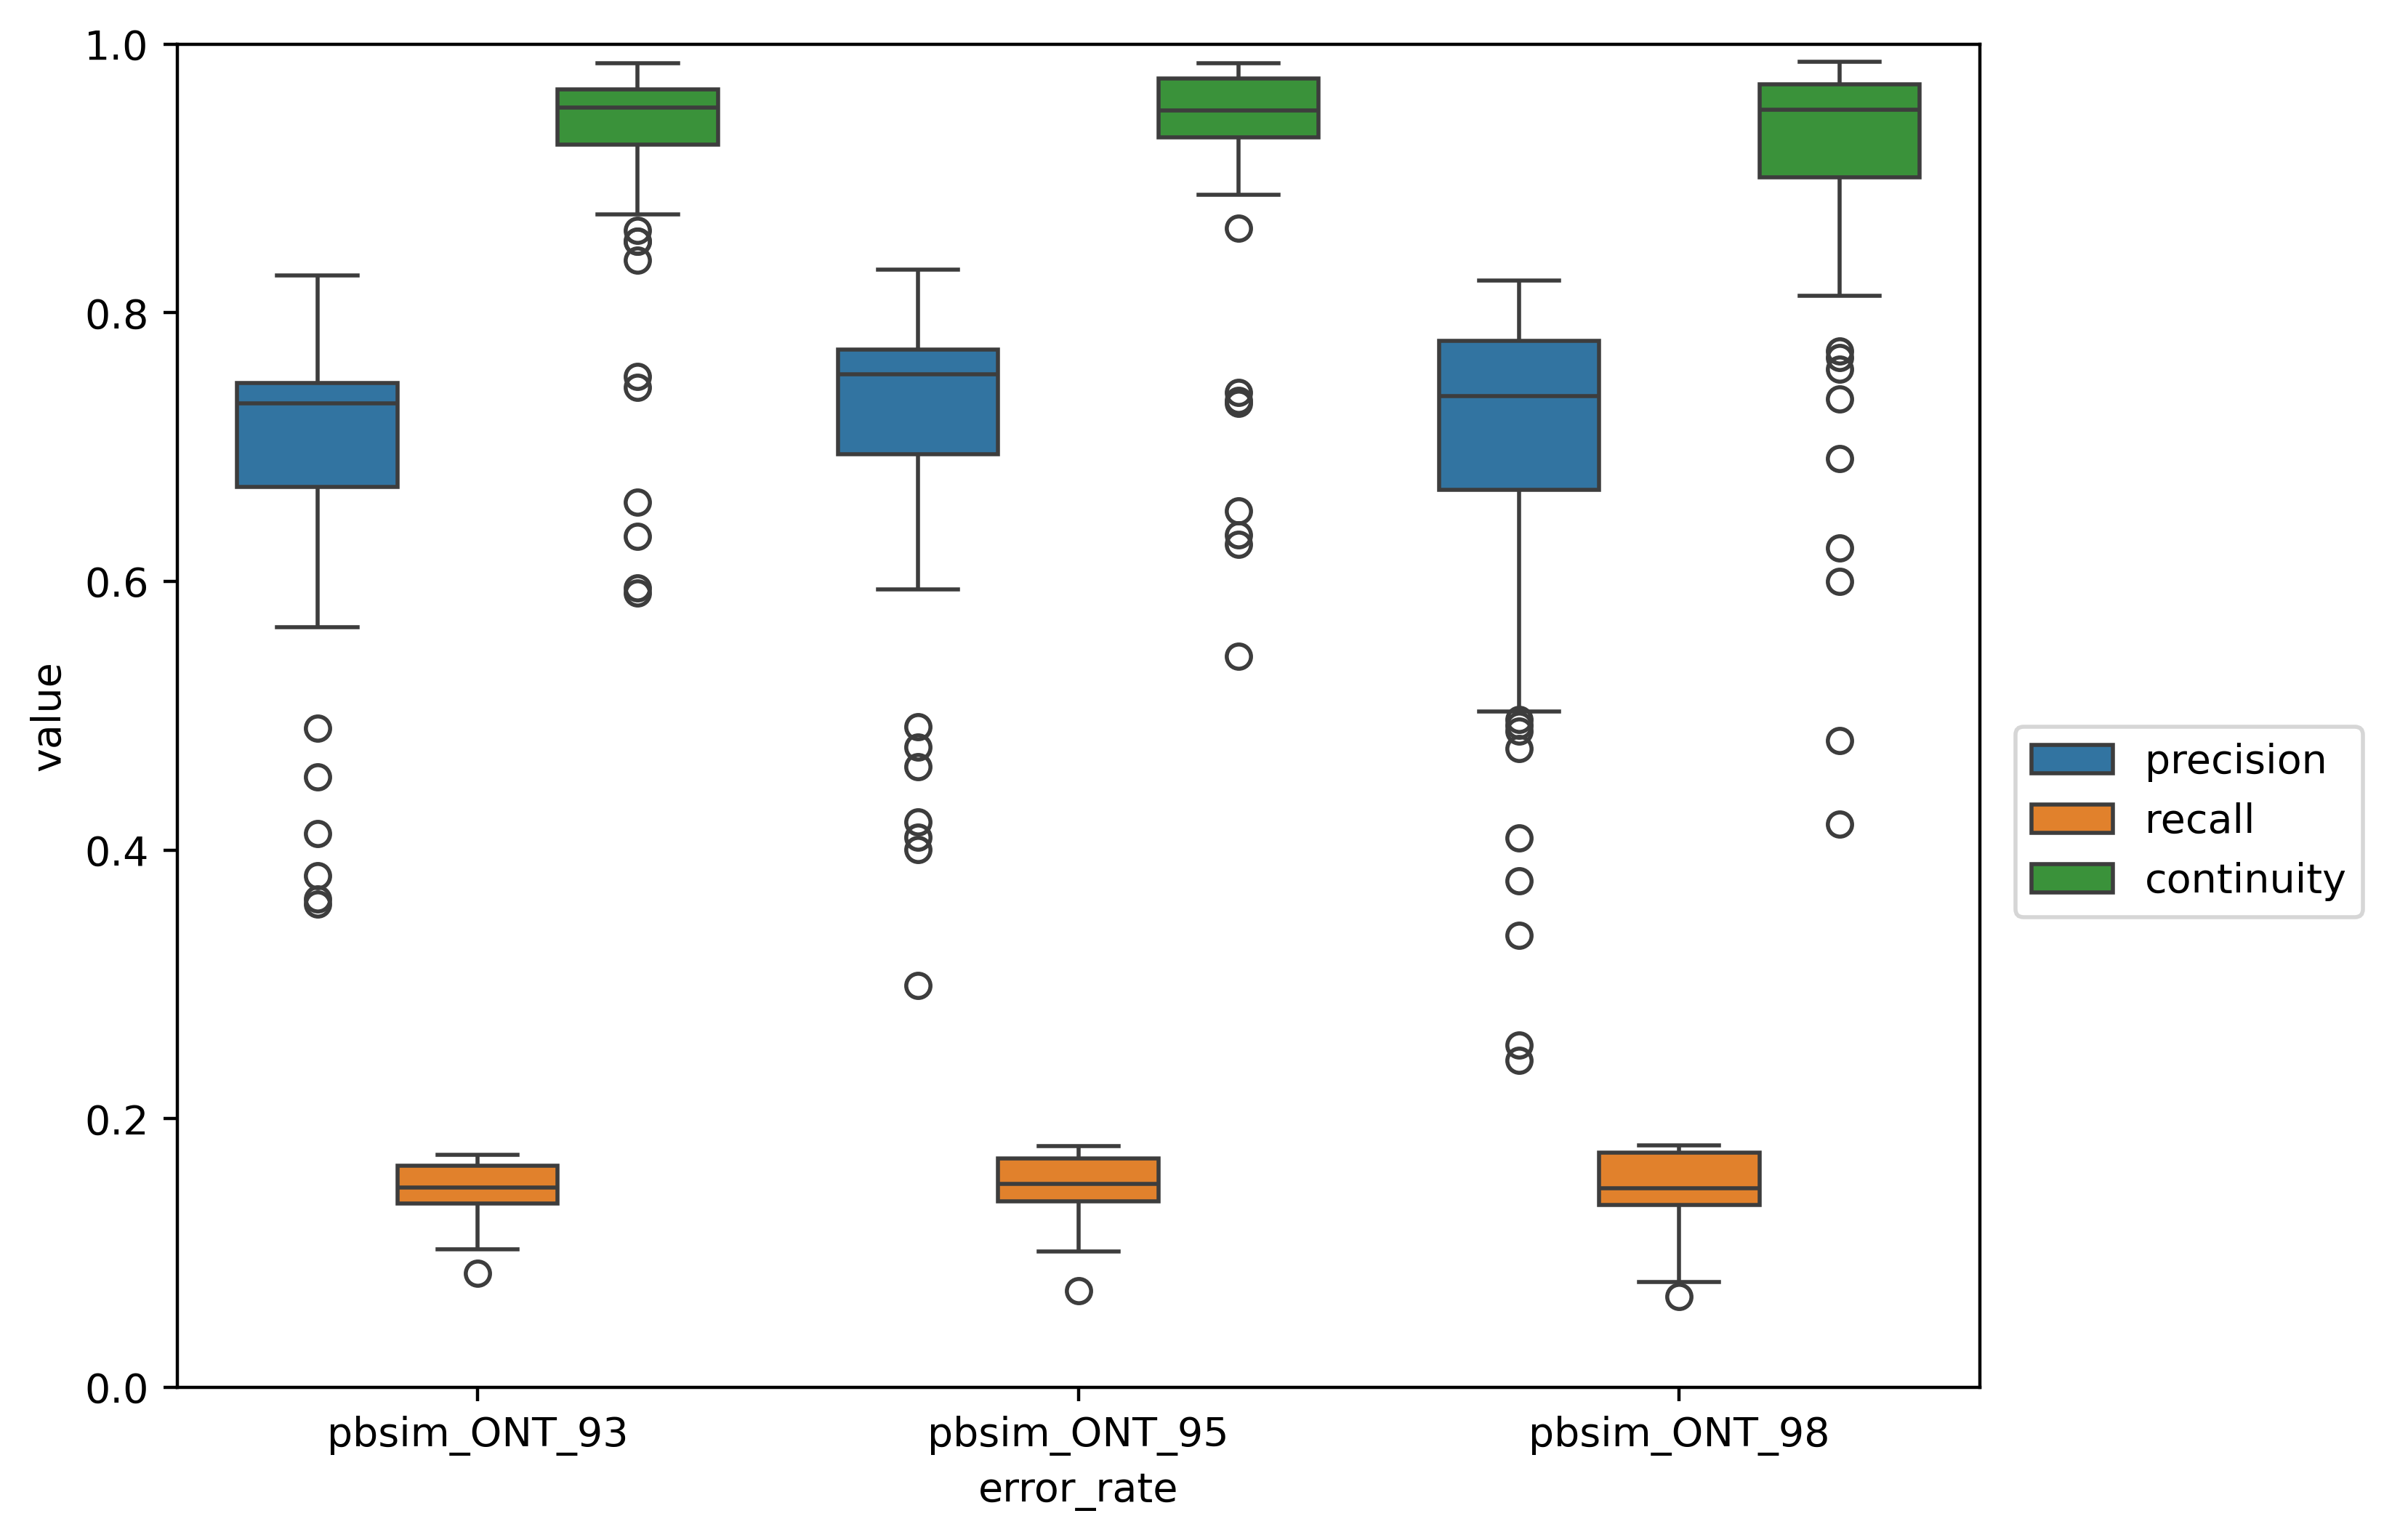

In [33]:
#one_line = one_line.replace({'GaussianRP_500d':'GaussianRP','PCA_500d':'PCA','Spectural_500d':'Spectral','SparseRP_500d':'SparseRP','scBiMap_500d':'scBiMapping','umap_500d':'UMAP'})  
fixed_order = ['precision', 'recall', 'continuity']
one_line['variable'] = pd.Categorical(one_line['variable'], categories=fixed_order, ordered=True)
one_line = one_line.sort_values(by=['error_rate','variable'])
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 400
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'error_rate', y = 'value', data = one_line,hue='variable')  #绘制箱线图
plt.legend(loc = (1.02,0.35))
plt.ylim(0,1)
#plt.xticks(rotation=45)

plt.show()


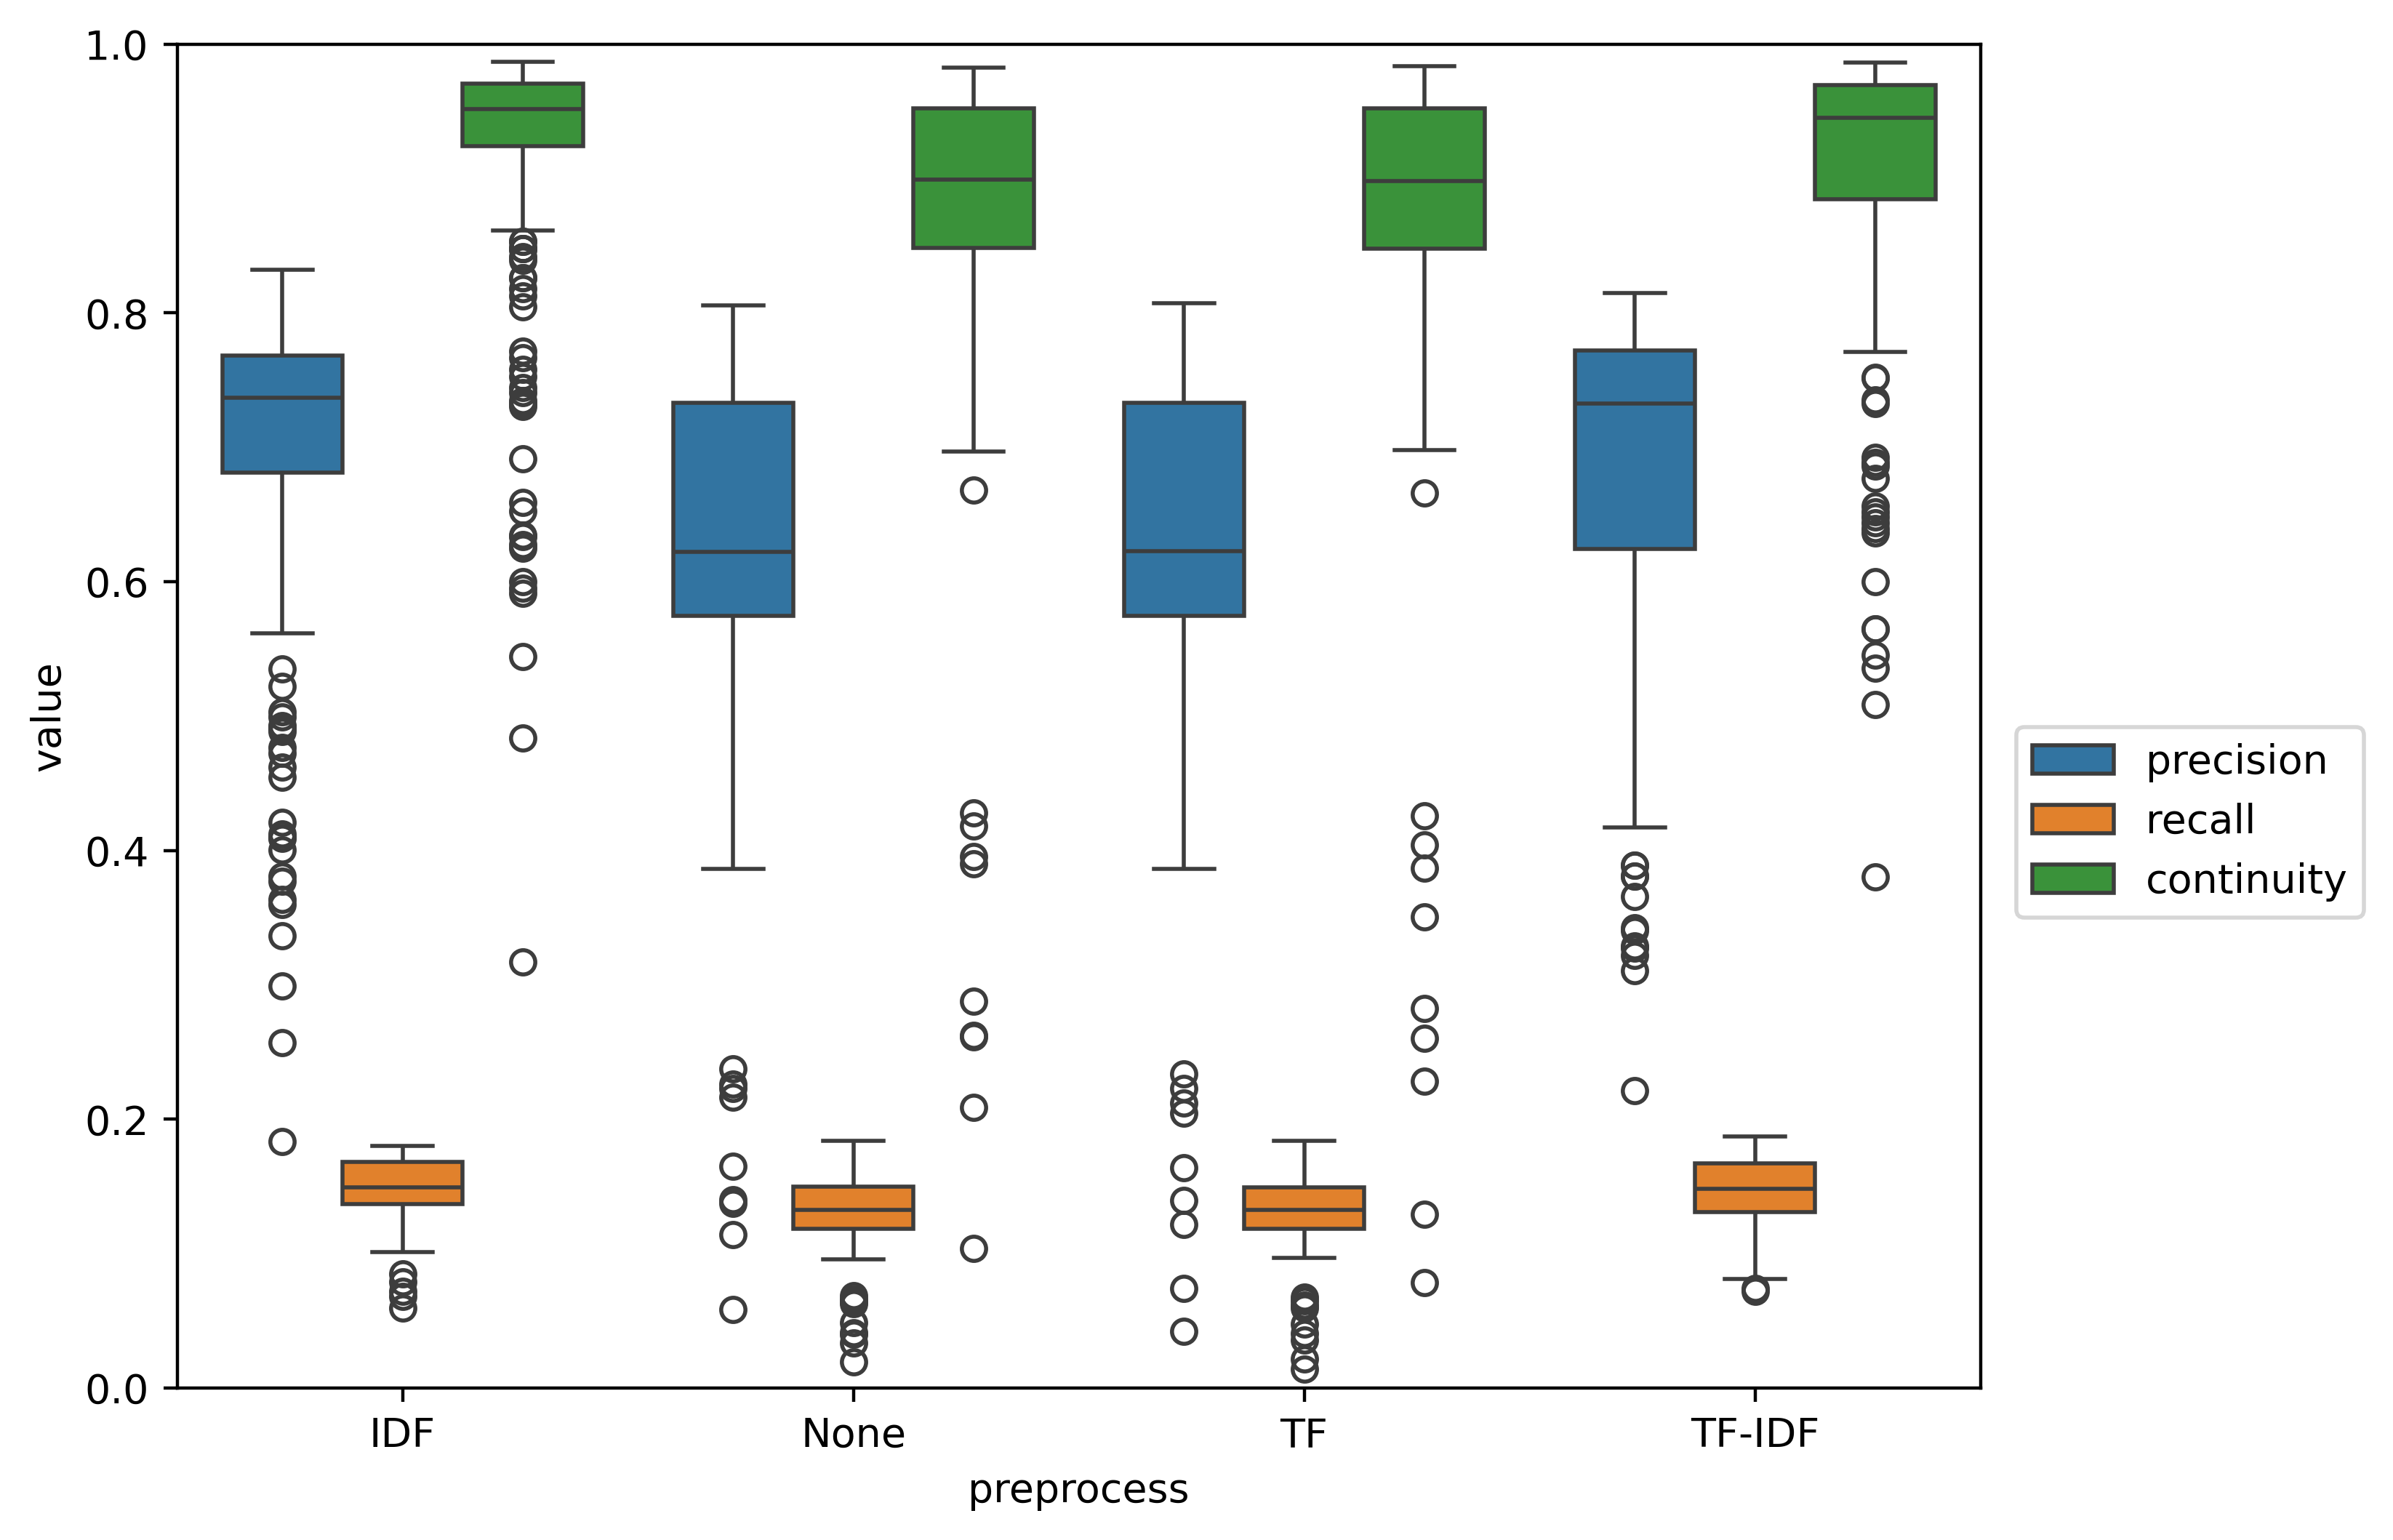

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 400
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'preprocess', y = 'value', data = one_line,hue='variable')  #绘制箱线图
plt.legend(loc = (1.02,0.35))
plt.ylim(0,1)
#plt.xticks(rotation=45)

plt.show()

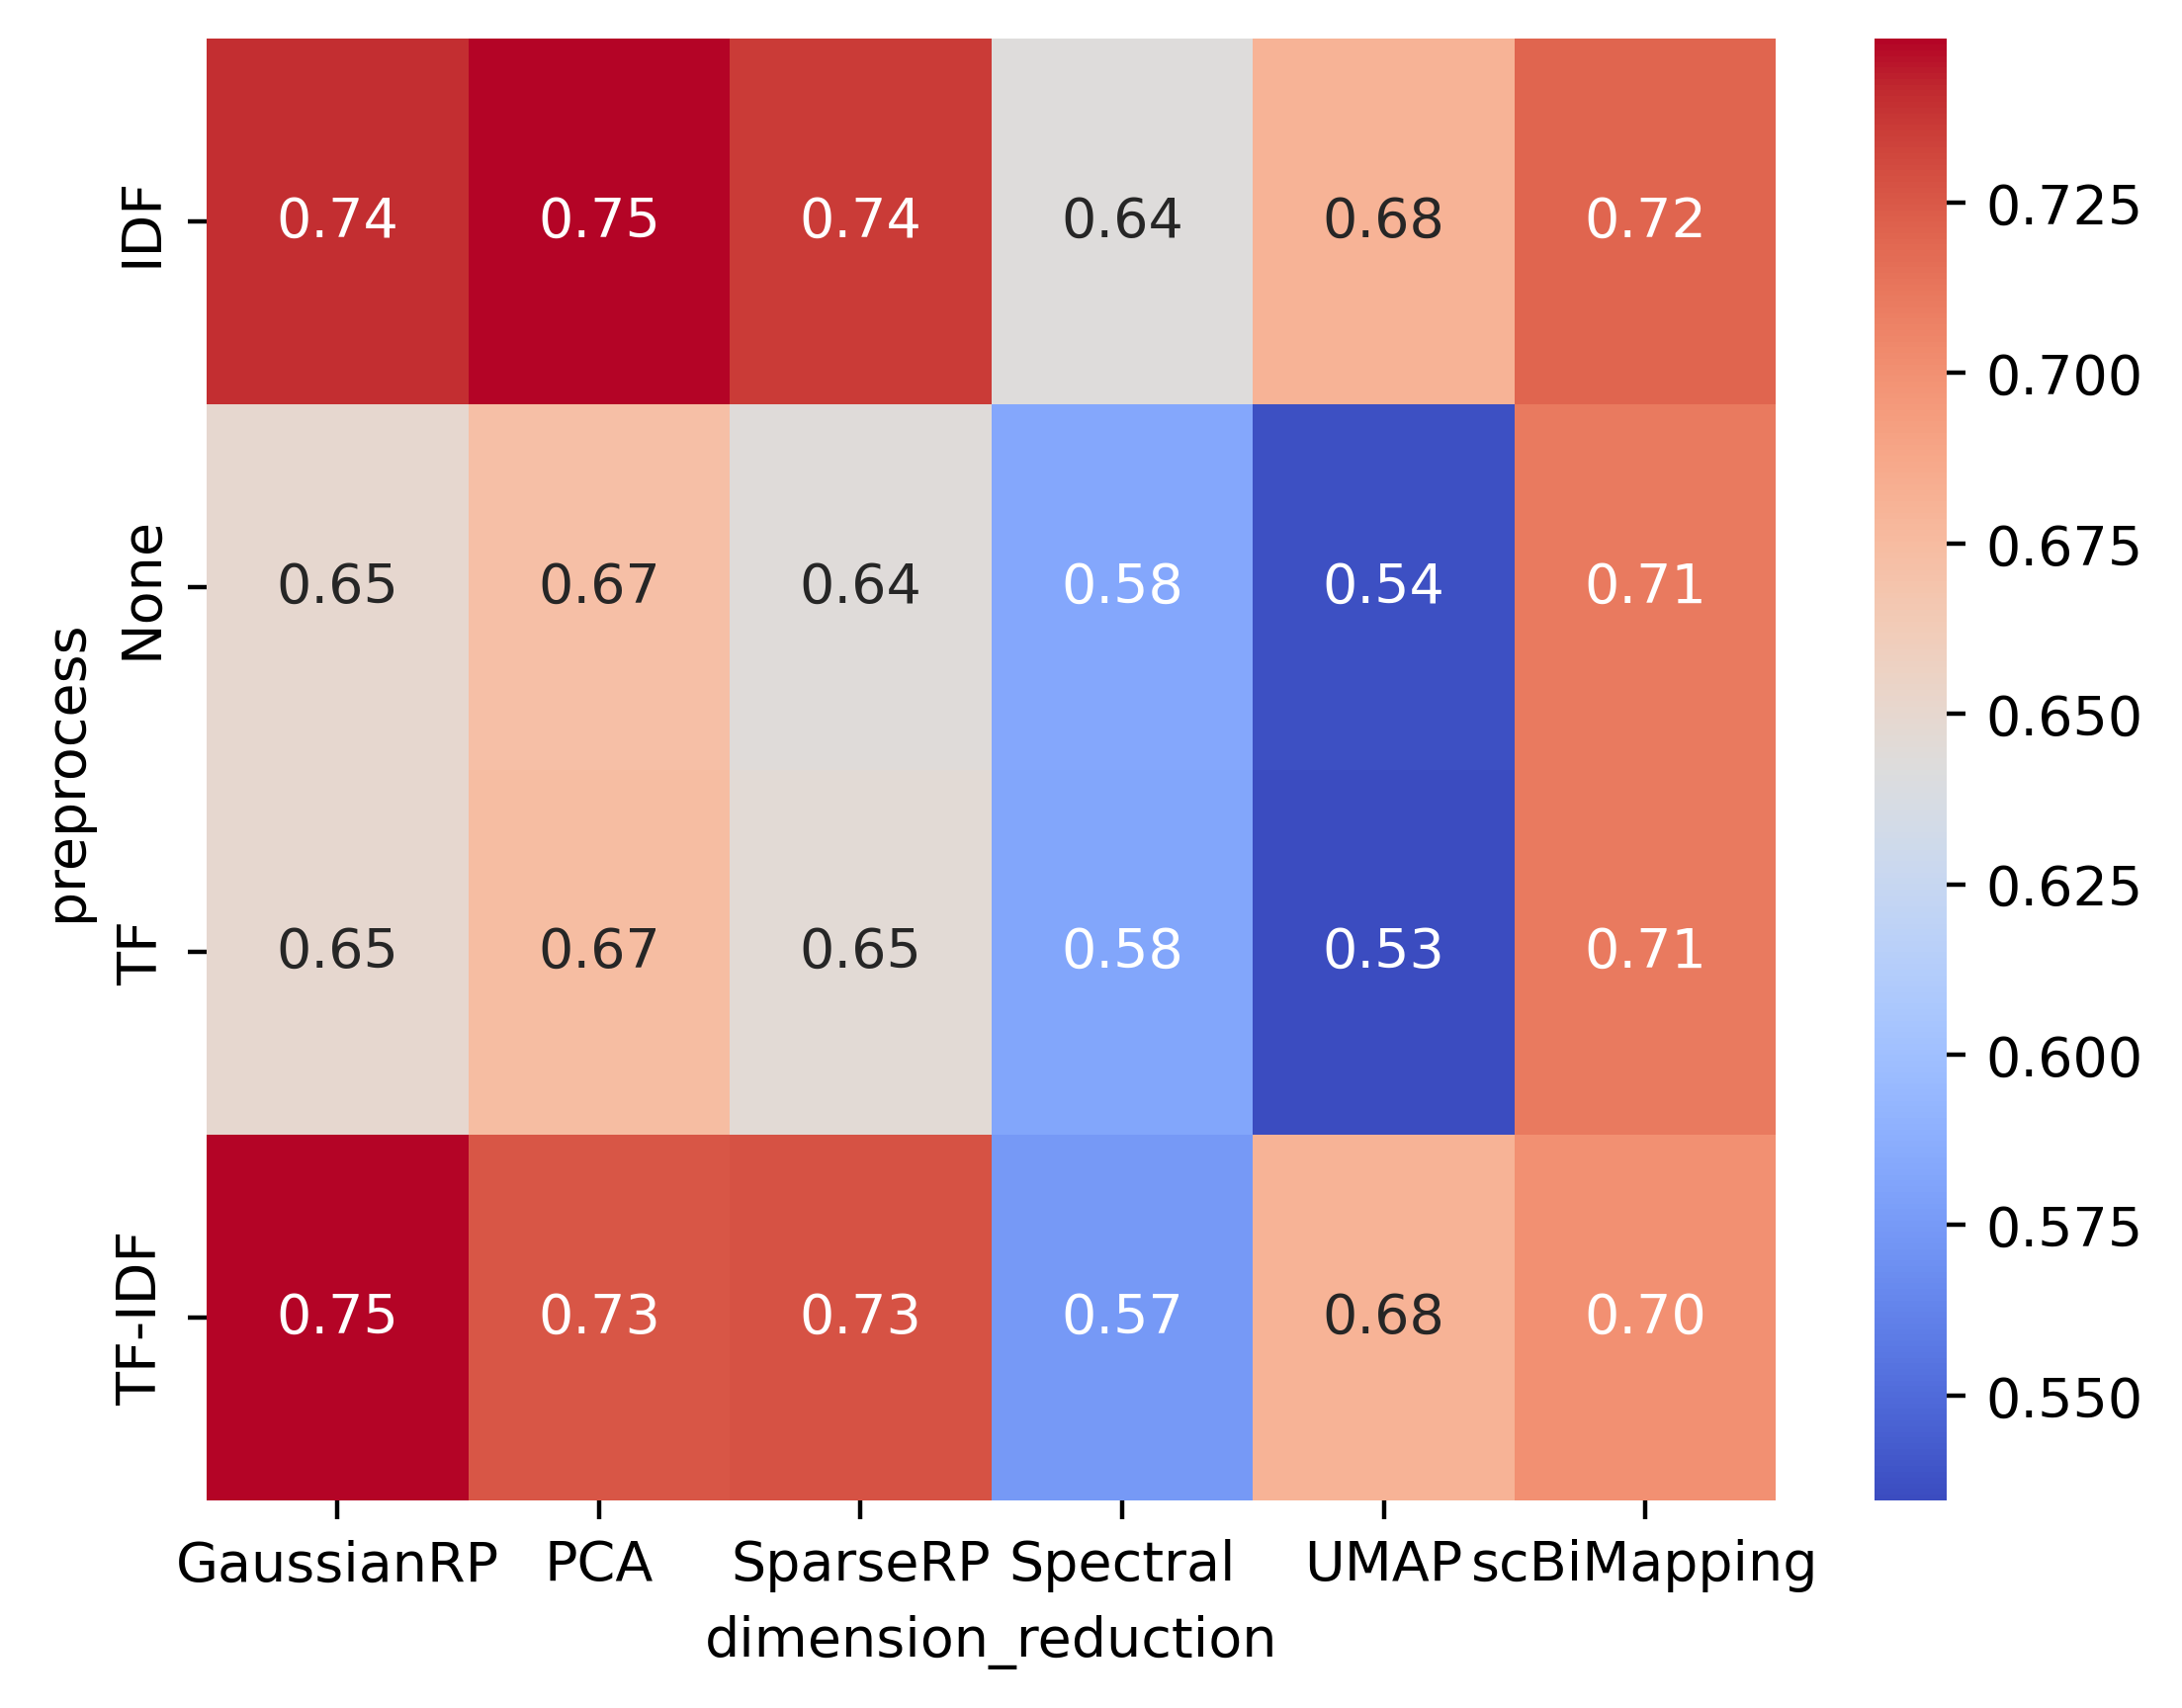

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
igk1 = igk.replace({'GaussianRP_500d':'GaussianRP','PCA_500d':'PCA','Spectural_500d':'Spectral','SparseRP_500d':'SparseRP','scBiMap_500d':'scBiMapping','umap_500d':'UMAP'})  
# 按 factor1 和 factor2 分组，计算 result 的均值
heatmap_data = igk1.pivot_table(index='preprocess', columns='dimension_reduction', values='precision', aggfunc='mean')

# 绘制热图
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [32]:
Counter(igk_idf.length.tolist())


Counter({'20k': 144, '10k': 144, '30k': 144})